In [1]:
import csv
import pandas as pd
import numpy as np

In [131]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.dates

In [3]:
import seaborn as sns

In [4]:
movies=pd.read_csv("./ml-dataset/movies.csv")

In [5]:
movies.head(10)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [6]:
links=pd.read_csv("ml-dataset/links.csv")
links.head(10)

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0
5,6,113277,949.0
6,7,114319,11860.0
7,8,112302,45325.0
8,9,114576,9091.0
9,10,113189,710.0


In [7]:
ratings=pd.read_csv("ml-dataset/ratings.csv")
ratings.head(10)

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580
5,1,112,3.5,1094785740
6,1,151,4.0,1094785734
7,1,223,4.0,1112485573
8,1,253,4.0,1112484940
9,1,260,4.0,1112484826


In [6]:
# # Switching to matrix calculation for speed; drop records without ratings
# final = pd.merge(movies, ratings, on='movieId', how='left')

In [7]:
import re

In [8]:
movies['release_year'] = movies['title'].str.strip().str.extract(r'^.*(\d{4})(.*)$')[0]

C:\Users\Yonge\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.


In [9]:
movies['release_year'] = movies[movies['release_year'].notnull()]['release_year'].astype(int)

In [10]:
movies['release_year'][0]

1995.0

# Filtering

In [11]:
# years=[]
# import numpy as np
# for i in range(len(movies)):
#     title=movies.iloc[i]["title"]
#     if "(" in title:
#         try:
#             year=int(movies.iloc[i]["title"].rsplit("(",1)[1].split(")")[0])
#         except ValueError:
#             year=np.nan
#     years.append(year)

In [12]:
movies_new = movies[movies.release_year > 2008]

In [13]:
#movies[movies.release_year > 2008].to_csv('./ml-dataset/movies10.csv')

In [14]:
movies_new.release_year.value_counts()

2009.0    1114
2012.0    1022
2011.0    1016
2013.0    1011
2010.0     962
2014.0     740
2015.0     120
Name: release_year, dtype: int64

# Link to tmdb

In [15]:
last_10yr_id = pd.Series(movies_new.movieId.unique())

In [16]:
last_10yr_id.to_csv('mID.csv', index=False)

# Genres

In [17]:
# years_sr=pd.Series(years)

In [18]:
# movies["release_year"]=years_sr.values
movies.head(5)

,movieId,title,genres,release_year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995.0
2,3,Grumpier Old Men (1995),Comedy|Romance,1995.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995.0
4,5,Father of the Bride Part II (1995),Comedy,1995.0


In [19]:
genres=movies["genres"]

In [20]:
genre=list(genres)

In [21]:
genres_list=[]
for g in genre:
    items=g.split("|")
    for item in items:
        if item in genres_list:
            pass
        else:
            genres_list.append(item)
print(genres_list)

['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy', 'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror', 'Mystery', 'Sci-Fi', 'IMAX', 'Documentary', 'War', 'Musical', 'Western', 'Film-Noir', '(no genres listed)']


In [22]:
for genre in genres_list:
    movies[genre]=0

Text(0.5,1,'Number of movies over time')

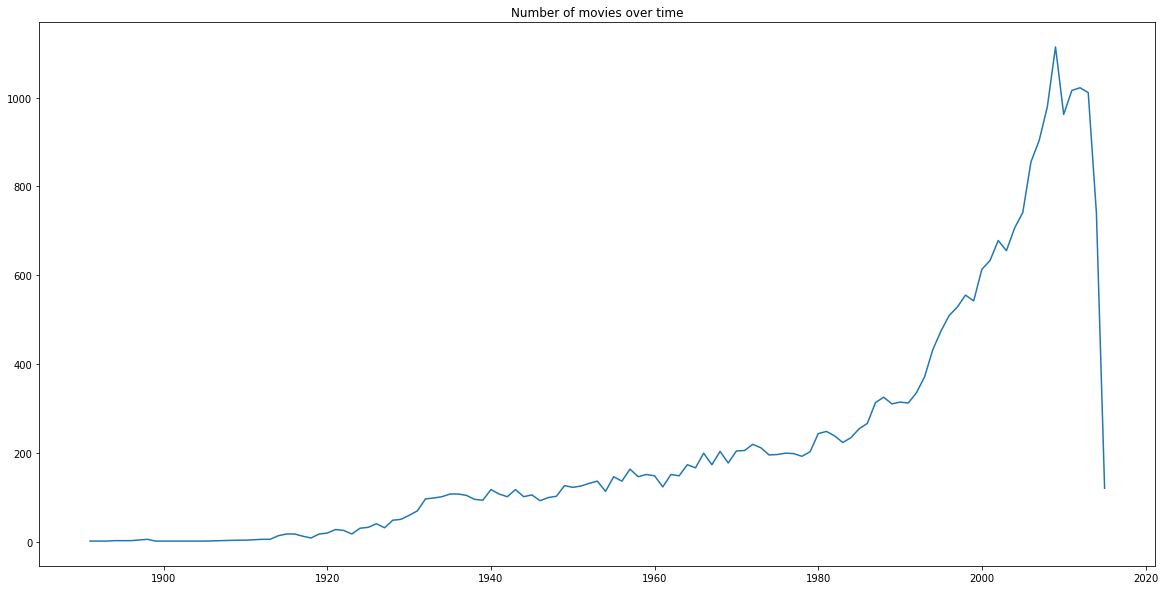

In [25]:
movies.release_year.value_counts().sort_index().plot(figsize=(20,10))
plt.title('Number of movies over time')

In [26]:
movies.head()

,movieId,title,genres,release_year,Adventure,Animation,Children,Comedy,Fantasy,Romance,...,Horror,Mystery,Sci-Fi,IMAX,Documentary,War,Musical,Western,Film-Noir,(no genres listed)
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,1995.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,1995.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
def genre(x):
    for g in movies.columns[4:]:
        if g in x['genres']:
            x[g] = 1
    return x

In [29]:
movies1 = movies.apply(func = genre, axis = 1)

In [30]:
movies1.head()

,movieId,title,genres,release_year,Adventure,Animation,Children,Comedy,Fantasy,Romance,...,Horror,Mystery,Sci-Fi,IMAX,Documentary,War,Musical,Western,Film-Noir,(no genres listed)
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995.0,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,1995.0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995.0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,1995.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
import numpy as np

In [32]:
max_yr=int(movies["release_year"].max())
min_yr=int(movies["release_year"].min())
print(min_yr,max_yr)

1891 2015


In [33]:
# all_years=[]
# for i in range(min_yr,max_yr+1):
#     all_years.append(i)
# print(all_years)
movies['release_year'].unique()

array([1995., 1994., 1996., 1976., 1992., 1988., 1967., 1993., 1964.,
       1977., 1965., 1982., 1985., 1990., 1991., 1989., 1937., 1940.,
       1969., 1981., 1973., 1970., 1960., 1955., 1959., 1968., 1980.,
       1975., 1986., 1948., 1943., 1950., 1946., 1987., 1997., 1974.,
       1956., 1958., 1949., 1972., 1998., 1933., 1952., 1951., 1957.,
       1961., 1954., 1934., 1944., 1963., 1942., 1941., 1953., 1939.,
       1947., 1945., 1938., 1935., 1936., 1926., 1932., 1979., 1971.,
       1978., 1966., 1962., 1983., 1984., 1931., 1922., 1999., 1927.,
       1929., 1930., 1928., 1925., 1914., 2000., 1919., 1923., 1920.,
       1918., 1921., 2001., 1924., 2002., 2003., 1915., 2004., 1916.,
       1917., 2005., 2006., 1902.,   nan, 1903., 2007., 2008., 2009.,
       1912., 2010., 1913., 2011., 1898., 1899., 1894., 2012., 1909.,
       1910., 1901., 1893., 2013., 1896., 2014., 1895., 2015., 1900.,
       1905., 1891.])

In [34]:
movies1.head()

,movieId,title,genres,release_year,Adventure,Animation,Children,Comedy,Fantasy,Romance,...,Horror,Mystery,Sci-Fi,IMAX,Documentary,War,Musical,Western,Film-Noir,(no genres listed)
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995.0,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,1995.0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995.0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,1995.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
movies_melt = movies1.melt(id_vars=['movieId', 'title', 'genres', 'release_year'], var_name='genre')

In [36]:
graph = movies_melt.pivot_table(index = ['release_year'], columns=['genre'], values=['value'], aggfunc = np.sum)

In [37]:
graph.columns = graph.columns.get_level_values(1)

In [38]:
graph.index.max()

2015.0

In [41]:
min(graph.index)

1891.0

In [42]:
graph

genre,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
release_year,,,,,,,,,,,,,,,,,,,,
1891.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1893.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1894.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
1895.0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1896.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1898.0,3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
1899.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1900.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1901.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


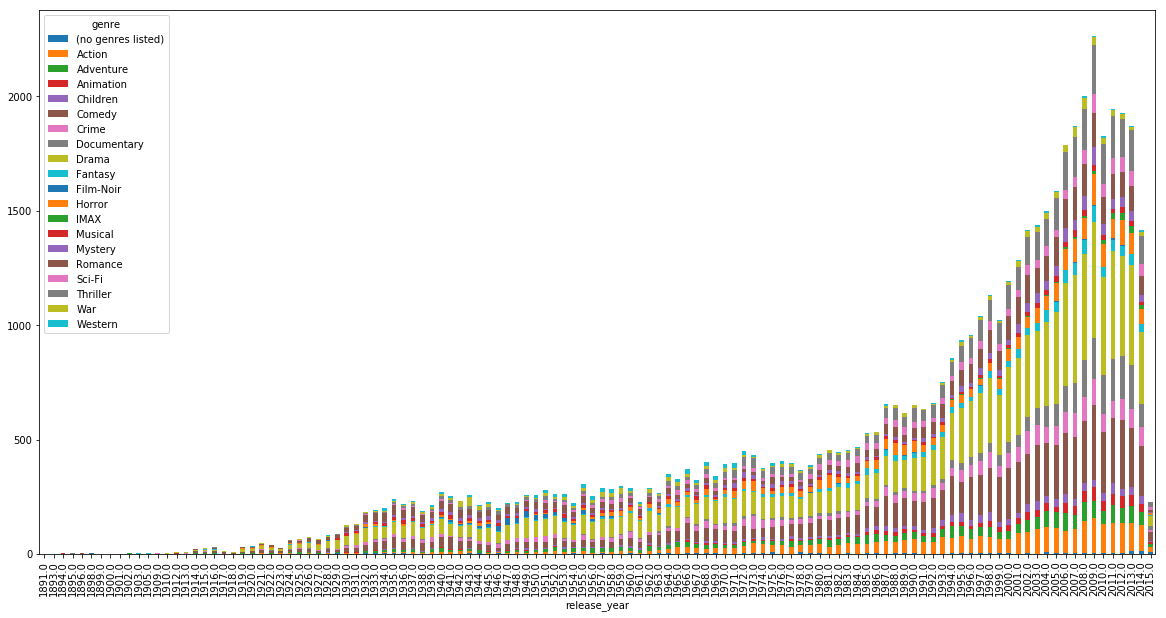

In [43]:

plt.figure()
graph.plot.bar(stacked=True,figsize=(20,10))


plt.show()

In [44]:
new_movies=movies.copy()

# Movies

In [49]:
movies.head()

,movieId,title,genres,release_year,Adventure,Animation,Children,Comedy,Fantasy,Romance,...,Horror,Mystery,Sci-Fi,IMAX,Documentary,War,Musical,Western,Film-Noir,(no genres listed)
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,1995.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,1995.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
movies_new

,movieId,title,genres,release_year
12856,60684,Watchmen (2009),Action|Drama|Mystery|Sci-Fi|Thriller|IMAX,2009.0
13033,62265,"Accidental Husband, The (2009)",Comedy|Romance,2009.0
13101,63072,"Road, The (2009)",Adventure|Drama|Thriller,2009.0
13338,65585,Bride Wars (2009),Comedy|Romance,2009.0
13341,65601,My Bloody Valentine 3-D (2009),Horror|Thriller,2009.0
13358,65682,Underworld: Rise of the Lycans (2009),Action|Fantasy|Horror|Thriller,2009.0
13375,65802,Paul Blart: Mall Cop (2009),Action|Comedy|Crime,2009.0
13376,65810,Notorious (2009),Drama|Musical,2009.0
13377,65813,"Unborn, The (2009)",Horror|Mystery|Thriller,2009.0
13384,65882,"Uninvited, The (2009)",Drama|Horror|Mystery|Thriller,2009.0


# Ratings

In [8]:
ratings['timestamp'] = pd.to_datetime(ratings['timestamp'],unit='s')

In [9]:
ratings['year'] = ratings['timestamp'].dt.year

In [10]:
ratings['month'] = ratings['timestamp'].dt.month

In [11]:
ratings['day'] = ratings['timestamp'].dt.day

In [12]:
ratings['hour'] = ratings['timestamp'].dt.hour

In [13]:
ratings['dow'] = ratings['timestamp'].dt.weekday

## Ratings over time

Text(0,0.5,'Rating')

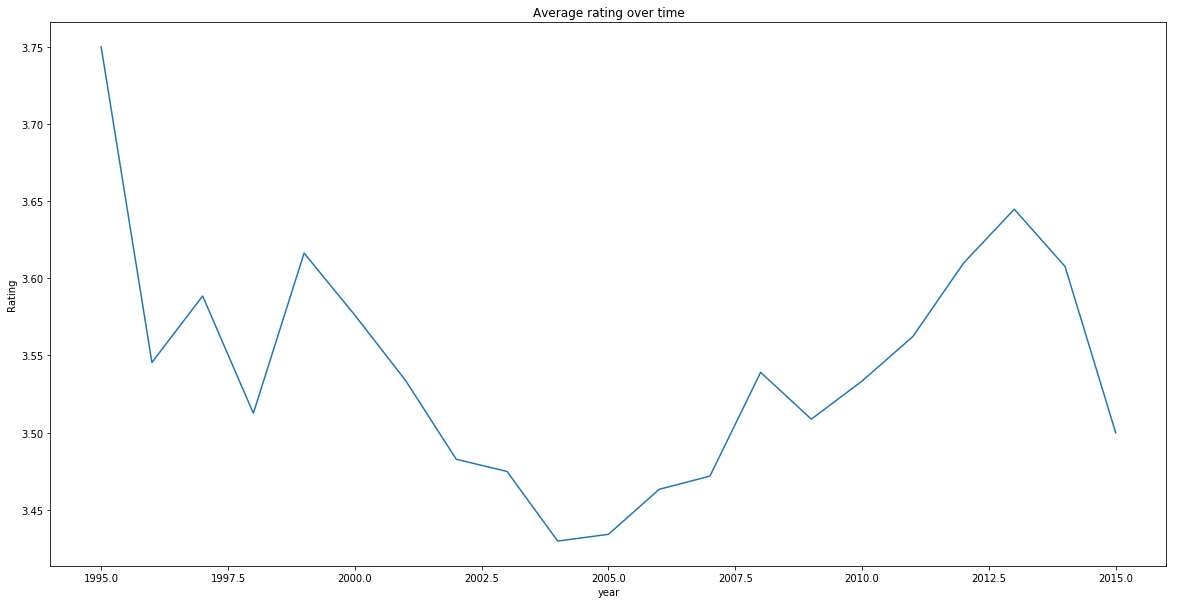

In [88]:
rating_year_month = ratings.groupby(['year'])['rating'].mean()
ax = rating_year_month.plot(figsize=(20,10))
ax.set_title('Average rating over time')
ax.set_ylabel('Rating')

Variation between months does not appear significant

Text(0,0.5,'Rating')

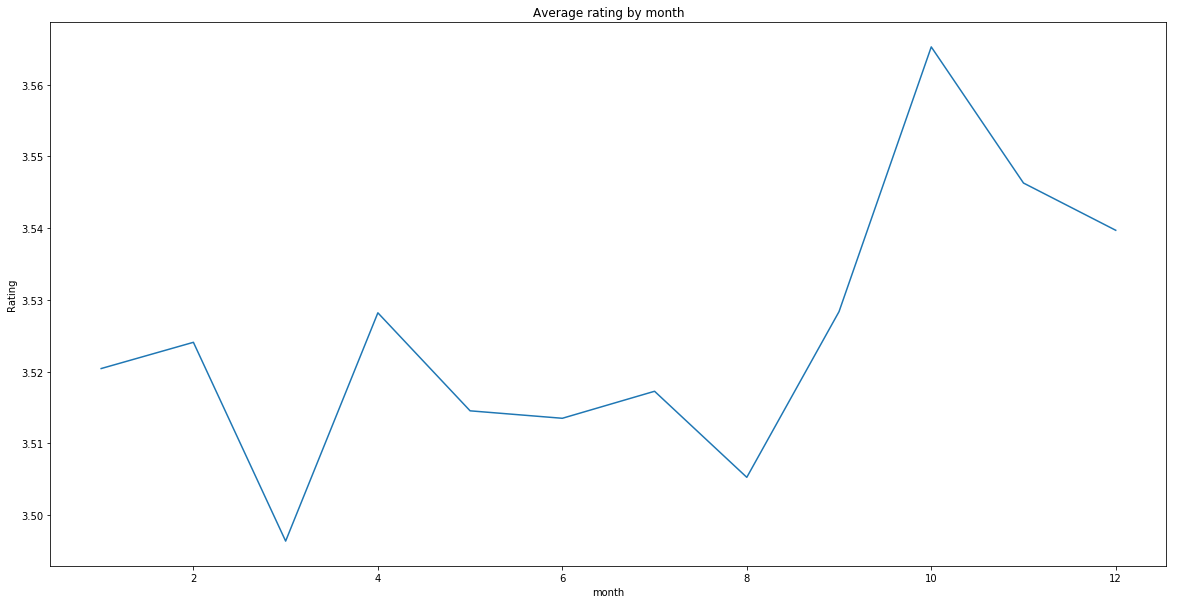

In [90]:
rating_year_month = ratings.groupby(['month'])['rating'].mean()
ax = rating_year_month.plot(figsize=(20,10))
ax.set_title('Average rating by month')
ax.set_ylabel('Rating')

Ratings already bucketed into intervals of 0.5
Average ratings between 3 and 4

Text(0,0.5,'Freq')

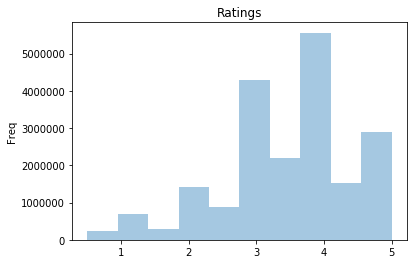

In [115]:
sns.distplot(ratings['rating'],kde = False, bins=10,
            hist_kws={"rwidth":1,})
plt.title('Ratings')
plt.xlabel('')
plt.ylabel('Freq')

Ratings appear slightly higher over the later part of the week

In [113]:
pd.DataFrame(ratings.groupby('dow')['rating'].median()).transpose()

dow,0,1,2,3,4,5,6
rating,3.5,3.5,3.5,3.5,4.0,4.0,4.0


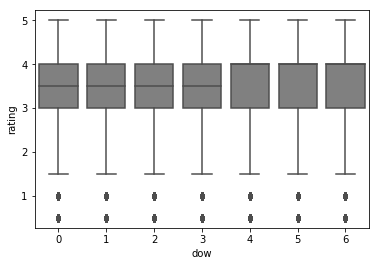

In [106]:
sns.boxplot(x='dow', y="rating", data=ratings,
            color='grey')

# TMDB

In [156]:
tmovies=pd.read_csv("./ml-dataset/tmovies.csv")

In [157]:
tmovies['release_date'] = pd.to_datetime(tmovies['release_date'])

In [161]:
tmovies['year'] = tmovies.release_date.dt.year
tmovies['month'] = tmovies.release_date.dt.month
tmovies['dow'] = tmovies.release_date.dt.weekday

In [162]:
tmovies.head()

,Unnamed: 0,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,...,spoken_languages,status,tagline,title,video,vote_average,vote_count,year,month,dow
0,0,False,/ok6Ws65nDSLAIKkKgIjqyM5OGCc.jpg,NaN,130000000,"[{'id': 28, 'name': 'Action'}, {'id': 9648, 'n...",https://www.warnerbros.com/watchmen,13183,tt0409459,en,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Justice is coming to all of us. No matter wha...,Watchmen,False,7.2,3918,2009.0,3.0,3.0
1,0,False,/mBVyrtzC2aHkPfbN8iKXCwJRaKE.jpg,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,13401,tt0809504,en,...,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,The Accidental Husband,False,5.3,248,2008.0,2.0,4.0
2,0,False,/pUNlJ6jzDsgUvPjJeFfsyyOSZJx.jpg,NaN,32000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 18, '...",http://www.theroad-movie.com/,20766,tt0898367,en,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,In a moment the world changed forever.,The Road,False,6.9,1496,2009.0,11.0,2.0
3,0,False,/f7pTesNnPjOVAq7QqhgnSHaK9Cc.jpg,NaN,30000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",http://www.bridewars.com,10521,tt0901476,en,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,May the best bride win,Bride Wars,False,6.0,1281,2009.0,1.0,4.0
4,0,False,/3ggNo1od6Rs1eJwhU3TkwJi3wbi.jpg,"{'id': 264437, 'name': 'My Bloody Valentine Co...",15000000,"[{'id': 9648, 'name': 'Mystery'}, {'id': 27, '...",http://www.mybloodyvalentinein3d.com/,14435,tt1179891,en,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,He's gonna break your heart.,My Bloody Valentine,False,5.3,433,2009.0,1.0,4.0


In [163]:
tmovies = tmovies[(tmovies['year'] > 2009) & (tmovies['year'] < 2016)]

In [164]:
tmovies['year'].value_counts()

2013.0    1032
2011.0    1007
2012.0     981
2010.0     929
2014.0     745
2015.0     114
Name: year, dtype: int64

In [165]:
tmovies.groupby('year')['revenue'].mean()

year
2010.0    2.514457e+07
2011.0    2.361051e+07
2012.0    2.614530e+07
2013.0    2.531662e+07
2014.0    3.456063e+07
2015.0    3.406507e+07
Name: revenue, dtype: float64

## Revenue

Text(0,0.5,'Revenue (USD)')

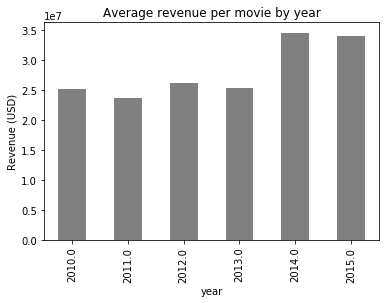

In [166]:
ax = tmovies.groupby('year')['revenue'].mean().plot(kind='bar', color='grey')
ax.set_title('Average revenue per movie by year')
ax.set_ylabel('Revenue (USD)')


## Budget

Text(0,0.5,'Budget (USD)')

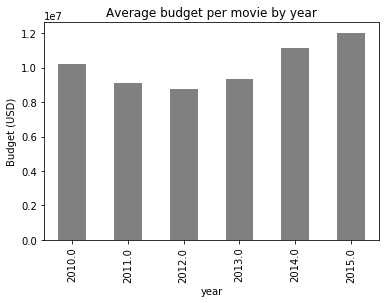

In [167]:
ax = tmovies.groupby('year')['budget'].mean().plot(kind='bar', color='grey')
ax.set_title('Average budget per movie by year')
ax.set_ylabel('Budget (USD)')


## Profit / Loss

On average, movies appear to have been profitable, making USD 15M per movie in 2010 and greater than USD 20M by 2015

In [168]:
tmovies['pl'] = tmovies['revenue'] - tmovies['budget']

C:\Users\Yonge\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Text(0,0.5,'Budget (USD)')

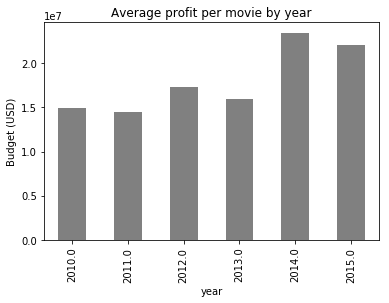

In [169]:
ax = tmovies.groupby('year')['pl'].mean().plot(kind='bar', color='grey')
ax.set_title('Average profit per movie by year')
ax.set_ylabel('Budget (USD)')

## Votes

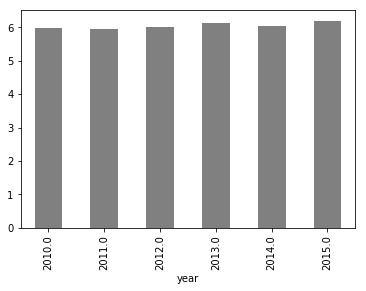

In [182]:
tmovies.groupby('year')['vote_average'].mean().plot(kind='bar', color='grey')